In [1]:
#importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
#reading the csv
df=pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


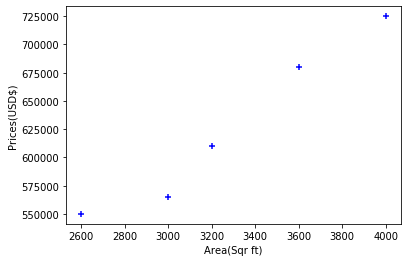

In [3]:
%matplotlib inline
# data scatter plot to see the distribution of data
plt.xlabel('Area(Sqr ft)')
plt.ylabel('Prices(USD$)')
plt.scatter(df.area,df.price,color='blue',marker='+')

In [4]:
# training the dataset
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
 reg.predict(3300)
    #price=m*area+b
    #y=mx+b
    #m is slope (or Gradient)
    #Y is intercept

array([628715.75342466])

In [6]:
# coefficient value (Slope)
reg.coef_

array([135.78767123])

In [7]:
#intercept value
reg.intercept_

180616.43835616432

In [8]:
# y=m*x+b

# y= 135.78767123*3300+180616.43835616432
135.78767123*3300+180616.43835616432

628715.7534151643

In [9]:
# So y=628715.7534151643 and its predicted the same.

In [10]:
#similarly for for area 2500
reg.predict(2500)

array([520085.61643836])

In [11]:
reg.coef_

array([135.78767123])

In [12]:
reg.intercept_

180616.43835616432

In [13]:
# y=m*x+b

# y= 135.78767123 *2500+180616.43835616432
135.78767123 *2500+180616.43835616432

520085.6164311643

In [14]:
# Similarly will predict for bulk of areas(Sq Ft) in that location 
# we have created the list of Areas in file areas.csv.

In [15]:
d=pd.read_csv('areas.csv')
d.head(5)

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [16]:
reg.predict(d)
# this is bit confusing to read

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [17]:
# will create the new column(predictedprice)

In [18]:
p=reg.predict(d)
d['predictedprice']=p
d
#however this is not permanent to file. its just display on screen

,area,predictedprice
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [19]:
#to save the new predictedprice column in new csv file.
d.to_csv("predictedprice.csv",index=False)
#index=False is to disable extra the column numbers

In [20]:
p2=pd.read_csv('predictedprice.csv')
p2.head(5)

,area,predictedprice
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836


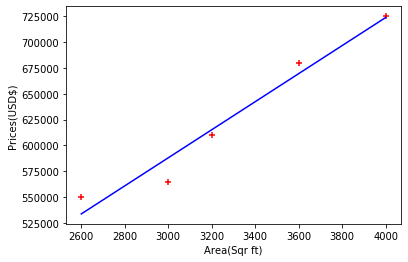

In [21]:
%matplotlib inline
#lets Drow the best fit(prediction) line of original data
plt.xlabel('Area(Sqr ft)')
plt.ylabel('Prices(USD$)')
plt.scatter(df.area,df.price ,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')